In [15]:
import pandas as pd
import numpy as np
import os

os.chdir('/Users/jonathanzhu/Documents/ev work/allegheny')
df = pd.read_csv('dhs_cleaned.csv')
client_attributes = pd.read_csv('dhs_client_attributes.csv')
client_date_attributes = pd.read_csv('dhs_client_date_attributes.csv')

```{index} histogram
```

# Plotting and Statistical Testing II

## Plotting

Making visualizations is a key part of EDAs. So in order to plot, we will use packages `matplotlib` and `seaborn` to make some nice-looking plots.

The type of plot made typically depends on the type of the data used, whether it is a discrete category or a continuous number, as well as the number of variables analysed in a single plot. We will go over some good plots for categorical data later in this section, but a reference table for common plots is given below.

|  | One Variable | Two Variables |
| --- | --- | --- |
| Discrete | Bar Plot | Countplot, Jitterplot, Tornado/Butterfly Plot |
| Continuous | Histogram, Density, Dotplot | Scatterplot, Fitted Curve, Density Plot |
| One of Each |  | Column Plot, Boxplot, Violin Plot |

### Histograms
Histograms are a good way of looking at the overall distribution of a single feature, or column. 

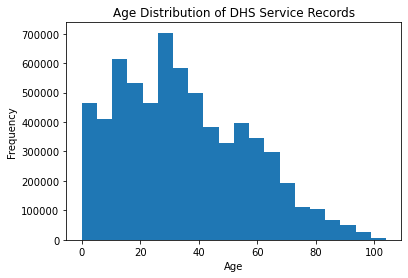

In [4]:
#here we want to make a histogram of the age column in the dataset
#using matplotlib.pyplot
import matplotlib.pyplot as plt

#since we already removed NA values, we can get straight to plotting
plt.hist(df['age'], bins=20)
#add some labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of DHS Service Records')
plt.show()

```{index} bar chart
```

### Barplots

To look at the distribution between distinct categories of a discrete variable, we can turn to bar plots. These can be vertical or horizontal, but with many categories, we will want to make the plot horizontal for readability.

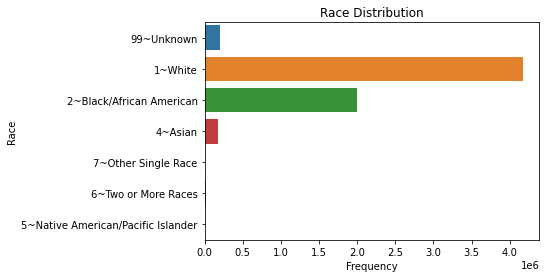

In [16]:
import seaborn as sns

sns.countplot(y = df['RACE'])
plt.title('Race Distribution')
plt.ylabel('Race')
plt.xlabel('Frequency')
plt.show()

```{index} scatter plot
```

### Scatter Plots
For looking at the relationship between two numerical variables, we turn to scatterplots. We can also add trend lines if we think there may be a relationship between the two.

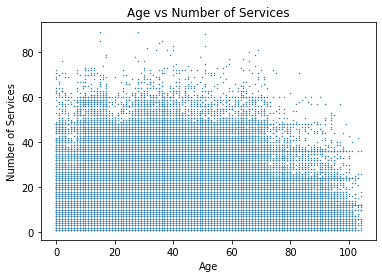

In [22]:
#make a scatterplot between age and number of services in the client_attributes dataset

sns.scatterplot(data = client_attributes, x = 'age', y = 'num_services', s = 2)
plt.title('Age vs Number of Services')
plt.xlabel('Age')
plt.ylabel('Number of Services')
plt.show()

```{index} boxplot
```

### Boxplots
For looking at the relationship between two variables, one numeric and one categorical, we can use boxplots, which also give some information on the quartiles of the numeric variable.

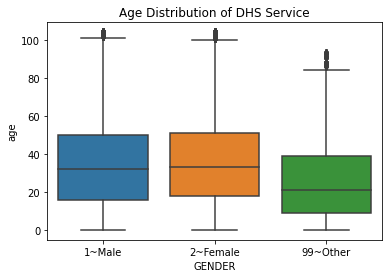

In [10]:
#we want to make a boxplot of age, separated by gender
#we can use seaborn for this
import seaborn as sns

sns.boxplot(data = df, x = "GENDER", y = "age")
plt.title('Age Distribution of DHS Service')
plt.show()

```{index} violin plot
```

### Violin plots
A variation on the boxplot is the violin plot, which shows the relative distributions of each of the groups you are examining.

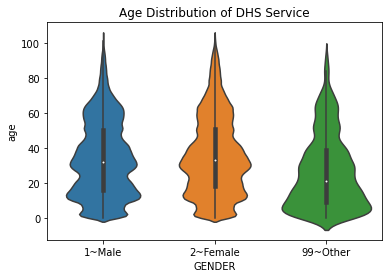

In [11]:
#we want to make the same as above, but with violin plots
sns.violinplot(data = df, x = "GENDER", y = "age")
plt.title('Age Distribution of DHS Service')
plt.show()

## Interpreting Plots

Plotting is one thing, but plots alone do not make for good EDAs. Plots must be interpreted as well. This part can be subjective, but with each iteration of EDA, you will hopefully get better and better interpretations.

If we refer to the histogram of ages for this dataset, what can we interpret?

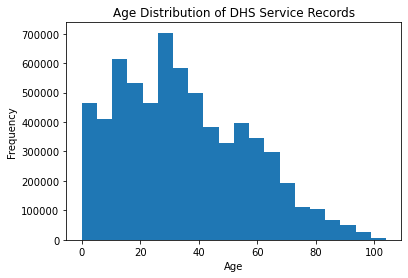

In [12]:
plt.hist(df['age'], bins=20)
#add some labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of DHS Service Records')
plt.show()

We can see that the distribution of ages is right-skewed but is somewhat normally distributed. The mean and mode seem to be around the late 30's. But we can be more objective with our interpretations by adding these statistics to the plot.

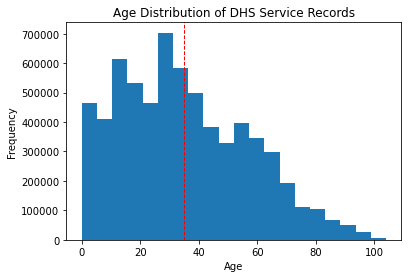

In [13]:
#remake previous histogram
#but add a line for the mean of the distribution
plt.hist(df['age'], bins=20)
#add some labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of DHS Service Records')
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

:::{admonition} Exercise 6.1
Repeat the above, adding the plot's estimated normal distribution.
:::

The exercise above asks to evaluate, visually, if this distribution approximately follows a normal distribution. The normal distribution is important for a myriad of statistical tests, which are discussed in the next section.

```{index} statistical test
```

```{index} t-test
```

```{index} null hypothesis
```

## Statistical Testing
While visualizations make for good reports and are a good way of visually looking at data, you can often get much more conclusive results about data by doing statistical tests. All statistical tests follow a principle of deviation from a *null hypothesis* $H_0$; this null hypothesis is what the tester assumes to be true. The tester then calculates the probability of the observations being the way they are given the null hypothesis; if the probability calculated is low, the tester can reject the null hypothesis. 

:::{warning} This is a massive simplification of the theory behind statistical testing. For more accurate theory, refer to the section on Statistical Inference.
:::

There are a myriad of statistical tests, most of which apply to numerical data, but a few of them apply to categorical data. As with plotting, different ones apply in different situations: whether or not we are comparing one or two samples, whether these samples follow a normal distribution, etc.

### Numerical Comparisons

In general, numerical comparison tests follow the null hypothesis of:
- (for one variable) The mean of the dataset is equal to a specific value
- (for two or more variables) The difference in the means of the groups is equal to zero

Tests involving numerical comparisons are split on how many groups are compared and whether or not these groups follow a normal distribution. The normal distribution assumption is critical for some of these tests; this is because the normal distribution was assumed in the making of these tests and therefore may give you incorrect conclusions if the data do not follow normal distributions when you use them.

|  | Analyzing One Variable | Analyzing Two Variables | Analyzing 3+ Variables |
| --- | --- | --- | --- |
| Normality Assumed | One-sample t-test | Two-sample t-test | ANOVA |
| Normality Not Assumed | Sign test | Mann-Whitney U-test, Wilcoxon signed-rank test | Kruskal-Wallis test |

```{index} t-test; one-sample
```

#### One Group Comparisons
To compare one variable to a set null hypothesis, we use a one-sample t-test (if the data follow a normal distribution) or a sign test (if not). Here, let's look at the number of services used by each person in the dataset, and we'll set the null hypothesis that these means are equal to 6.

In [23]:
#for the num_services column in the client_attributes dataset
#perform one-sample t-test and sign test
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon

#perform one-sample t-test
t_stat, p_val = ttest_1samp(client_attributes['num_services'], 6)
print('One-sample t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_val)
print("")

#perform sign test
t_stat, p_val = wilcoxon(client_attributes['num_services'] - 6)
print('Sign test results:')
print('Test statistic:', t_stat)
print('p-value:', p_val)

One-sample t-test results:
t-statistic: 628.1046487314816
p-value: 0.0

Sign test results:
Test statistic: 2322208324.0
p-value: 0.0


```{index} t-test; paired
```

```{index} analysis of variance (ANOVA)
```

These statistics are indicative of the mean number of services used being different from 6. We would need to perform additional visualizations or testing to get more insights than this, however.

#### Two Group Comparisons

To compare two groups of data, we would use a paired t-test or a Mann-Whitney U-Test depending on if the groups are normally distributed or not, respectively. The null hypothesis here is that the difference in means between the two groups is some value, typically zero.

Here, let's split the number of services used by gender. Note that this dataset has some entries where the gender is listed as "other", which we saw in plotting. For instructional purposes, we will remove these entries; in practice, we will want to include these with ANOVA or Kruskal-Wallis, which is discussed in the next section.

In [24]:
#t-test and mann-whitney u test for num-services split by gender
#removing "other" entries in gender
intermediate_client_atts = client_attributes[client_attributes['GENDER'] != '99~Other']

#perform t-test
from scipy.stats import ttest_ind
m = intermediate_client_atts[intermediate_client_atts['GENDER'] == '1~Male']['num_services']
f = intermediate_client_atts[intermediate_client_atts['GENDER'] == '2~Female']['num_services']

t_stat, p_val = ttest_ind(m, f)
print('T-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_val)
print("")

#perform mann-whitney u test
from scipy.stats import mannwhitneyu
t_stat, p_val = mannwhitneyu(m, f)
print('Mann-Whitney U test results:')
print('Test statistic:', t_stat)
print('p-value:', p_val)

T-test results:
t-statistic: -1.205624178437287
p-value: 0.22796301465831825

Mann-Whitney U test results:
Test statistic: 29664099747.5
p-value: 1.5309720336376268e-06


We can see here that these tests give very different p-values. It is best practice then to see which test is more accurate, and we would do this by testing the normality of each group. We can do this with a normality test (discussed later in this section) or by using histograms for visual confirmation.

:::{admonition} Exercise 6.2
For the groups tested above, make the histograms for each and judge which test yields a more accurate conclusion.
:::

#### Many-Group Comparisons

To compare three or more groups, we could do t-tests or Mann-Whitney U-tests between each pairing of groups. However, this yields a higher possibility of what are known as Type I Errors (rejecting a null hypothesis when we should not reject it). The mathematical theory as to why this is the case is not important; what is more important is that we have ways to circumvent this.

Again, for normally and non-normally distributed data, we use Analysis of Variance (ANOVA) or a Kruskal-Wallis Test, respectively. Here, let's look at the number of services used split by race.

In [26]:
#perform anova and kruskal-wallis test for num-services split by race
#not removing any values this time
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform anova
model = ols('num_services ~ RACE', data = client_attributes).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA results:')
print(anova_table)
print("")

#perform kruskal-wallis test
from scipy import stats
r_unknown = client_attributes[client_attributes['RACE'] == '99~Unknown']['num_services']
r_white = client_attributes[client_attributes['RACE'] == '1~White']['num_services']
r_black = client_attributes[client_attributes['RACE'] == '2~Black/African American']['num_services']
r_asian = client_attributes[client_attributes['RACE'] == '4~Asian']['num_services']
r_native = client_attributes[client_attributes['RACE'] == '5~Native American/Pacific Islander']['num_services']
r_more = client_attributes[client_attributes['RACE'] == '6~Two or More Races']['num_services']
r_other = client_attributes[client_attributes['RACE'] == '7~Other Single Race']['num_services']

t_stat, p_val = stats.kruskal(r_unknown, r_white, r_black, r_asian, r_native, r_more, r_other)
print('Kruskal-Wallis test results:')
print('Test statistic:', t_stat)
print('p-value:', p_val)

ANOVA results:
                sum_sq        df           F         PR(>F)
RACE      9.701921e+04       6.0  236.969478  1.271657e-303
Residual  3.346570e+07  490440.0         NaN            NaN

Kruskal-Wallis test results:
Test statistic: 1219.5315398715004
p-value: 2.836686948222061e-260


Both of these tests have low p-values, indicating that there is a significant difference within at least one pairing. To determine where this difference is, we have to use what are called post-hoc tests. For ANOVA, we use TukeyHSD Post-hoc tests, and for Kruskal-Wallis, we use Dunn tests. Here, we only look at TukeyHSD, especially as post-hoc tests for Kruskal-Wallis are less common, which is understandable given that Kruskal-Wallis tests are less common as a whole.

In [27]:
#post-hoc tests for the anova test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = client_attributes['num_services'], groups = client_attributes['RACE'], alpha = 0.05)
print(tukey.summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
                           1~White           2~Black/African American   0.4477  0.001  0.3702  0.5251   True
                           1~White                            4~Asian  -1.4977  0.001 -1.7021 -1.2932   True
                           1~White 5~Native American/Pacific Islander  -1.4682 0.0625 -2.9764  0.0399  False
                           1~White                6~Two or More Races  -0.2988    0.9 -1.0409  0.4432  False
                           1~White                7~Other Single Race  -1.3499 0.0108 -2.5105 -0.1894   True
                           1~White                         99~Unknown  -1.4201  0.001 -1.6131  -1.227   True
          2~Black/A

```{index} chi-squared test
```

### Categorical Analysis: Chi-Square Tests of Independence
A good way to compare two categorical datatypes is to use a chi-square test of independence. This can easily be called from packages in `scipy.stats`.

This test operates on the null hypothesis that the two categories are independent of each other; in other words, there exists no relationship between the two chosen variables. It creates a contingency table, splitting each variable on its own axis and putting the number of occurrences of each kind of data point in its respective box. For example:

| | Apples | Bananas |
| --- | --- | --- |
| Fresh | 30 | 27 |
| Frozen | 5 | 3 |

The above contingency table indicates that there are 30 occurrences of fresh apples in our pretend dataset. This data may have come from a dataset such as

| | Fruit Type | Quality |
| --- | --- | --- |
| 0 | Apple | Fresh |
| 1 | Banana | Fresh |
| 2 | Apple | Fresh |
| 3 | Apple | Frozen |
| ... | ... | ... |
| 64 | Banana | Frozen |

The contingency table then adds subtotals to each row and column; for example:

| | Apples | Bananas | Total |
| --- | --- | --- | --- |
| Fresh | 30 | 27 | 57 |
| Frozen | 5 | 3 | 8 |
| Total | 35 | 30 | 65 |

It then calculates an expected value for each entry by multiplying that entry's row and column totals, then dividing it by the total number of occurrences. So the expected number of fresh apples would be $\frac{35 * 57}{65} = 30.69$. This is done for all entries; the two tables are then compared for deviation from each other. 

For a dataset such as what we are using, doing this would be impossible by hand, but computers make it easy.

In [24]:
#we are going to do a chi-square test of independence
#to see if there is a relationship between RACE and EDUCATION_LEVEL
#we can use the scipy library for this
from scipy.stats import chi2_contingency

#first we get the categories from the race column
race_cats = df["RACE_cat"].astype('category').cat.categories
race = pd.Categorical(df["RACE_cat"], categories=race_cats)
#then same for education
edu_cats = df["EDUCATION_LEVEL_cat"].astype('category').cat.categories
edu = pd.Categorical(df["EDUCATION_LEVEL_cat"], categories=edu_cats)
#now the contingency table
tab = pd.crosstab(race, edu)

#now we can run the chi-square test
chi2, p, dof, expected = chi2_contingency(tab)
print("Chi-square test of independence: p = ", p, "chi2 = ", chi2)

Chi-square test of independence: p =  0.0 chi2 =  19200.2208703978


```{index} normality test
```

This incredibly high statistic and this very low p-value indicates that there is a dependency between race and education level. 

While other categorical data tests exist, such as Fisher's Exact test and McNemar's test, they are not used very often in practice, especially for EDA. 

### Normality Tests

In practice, tests comparing numerical data may give you the same result regardless of what test you use. However, to assume that this will be the case is not good practice. It is better to perform both tests and analyze differences; if differences between the two tests' conclusions arise, then it is good to perform normality tests to narrow down which conclusion is more accurate.

Normality tests operate on the null hypothesis that there is no deviation from a normal distribution for a given dataset. Its associated p-value is low if there is significant deviation from a normal distribution and high if the data follow an approximate normal distribution.

There are many tests to analyze normality, but the one with the most power is the Shapiro-Wilk test. We'll use this test to look at the normality of the number of services used overall.

In [28]:
#shapiro-wilk test for normality of num_services in client_attributes
from scipy.stats import shapiro

stat, p = shapiro(client_attributes['num_services'])
print('Shapiro-Wilk test results:')
print('Test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test results:
Test statistic: 0.6876380443572998
p-value: 0.0


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This p-value indicates that it is likely this distribution is not normal. To confirm this is the case, however, we should also make a histogram.

## EDA Project, Part 2
EDA typically involves many more tools and statistical techniques than are described in this chapter. As such, refer to outside documentation, such as for `scipy.stats`, and look into the following:
 - Convert all date variables into the date datatype from their current string type.
 - Summarize the date/ID paired client attribute dataset. How many clients used the services in January? How many clients used services by each month?
 - What is the average number of services a client use? 
 - How many clients receive services every month? 
 - Does the number of services per client increase over time? 
 - Do the statistics on the columns make sense? For example, are there any inconsistencies between age and education level? 

Secondly, perform many plots and tests and isolate the ones you believe to carry the most notable results.